In [1]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
ds  = cat["LLC4320_SST"].to_dask()

In [4]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41485")
client

<Client: 'tcp://127.0.0.1:41485' processes=4 threads=8, memory=29.39 GiB>

In [5]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/MEOM-NEMO.yaml")
ds  = cat["eNATL60_BLBT02_SSU"].to_dask()

In [6]:
ds

<xarray.Dataset>
Dimensions:              (y: 4729, x: 8354, time_counter: 8760, axis_nbounds: 2)
Coordinates:
    nav_lat              (y, x) float32 dask.array<chunksize=(296, 1045), meta=np.ndarray>
    nav_lon              (y, x) float32 dask.array<chunksize=(296, 1045), meta=np.ndarray>
    time_centered        (time_counter) datetime64[ns] dask.array<chunksize=(744,), meta=np.ndarray>
  * time_counter         (time_counter) datetime64[ns] 2009-07-01T00:30:00 .....
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    sozocrtx             (time_counter, y, x) float32 dask.array<chunksize=(24, 120, 120), meta=np.ndarray>
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
Attributes: (12/14)
    Conventions:  CF-1.6
    NCO:          4.4.6
    TimeStamp:    08/01/2019 09:34:23 +0100
    description:  ocean U grid variables
    file_name:    eNATL60-BLBT02_1h_20090630_20090704_gridU-2D_20090701-20090...
    history:      Fri May 24 23:57:12 2019: ncks -O -F -v sozocrtx /store/CT1...
    ...           ...
    name:         /scratch/tmp/3746956/eNATL60-BLBT02_1h_20090630_20090704_gr...
    ni:           8354
    nj:           9
    timeStamp:    2018-Dec-31 18:46:07 GMT
    title:        ocean U grid variables
    uuid:         f5d3ef01-77a3-4c9a-967c-21b5c90cdf32

In [13]:
ssu=ds.sozocrtx.sel(time_counter=slice("2010-01-01", "2010-01-30"))

In [14]:
ssu

<xarray.DataArray 'sozocrtx' (time_counter: 720, y: 4729, x: 8354)>
dask.array<getitem, shape=(720, 4729, 8354), dtype=float32, chunksize=(24, 120, 120), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(296, 1045), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(296, 1045), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-01-01T00:30:00 ... 2010...
Dimensions without coordinates: y, x
Attributes:
    cell_methods:        time: mean (interval: 40 s)
    interval_operation:  40 s
    interval_write:      1 h
    long_name:           ocean surface current along i-axis
    online_operation:    average
    units:               m/s

CPU times: user 39 s, sys: 2.96 s, total: 42 s
Wall time: 18min 27s


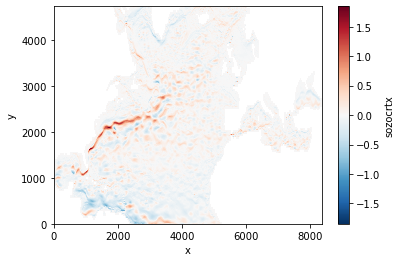

In [16]:
%%time
ssu.mean(dim='time_counter').plot()

In [3]:
ssh=ds.sossheig
ssh

<xarray.DataArray 'sossheig' (time_counter: 8760, y: 3454, x: 5422)>
dask.array<open_dataset-639f5ede75491e813ce64eb8637067d3sossheig, shape=(8760, 3454, 5422), dtype=float32, chunksize=(1, 3454, 5422), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(432, 678), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(432, 678), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(744,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2012-10-01T00:30:00 ... 2013...
Dimensions without coordinates: y, x
Attributes:
    cell_methods:        time: mean (interval: 40 s)
    interval_operation:  40 s
    interval_write:      1 h
    long_name:           sea surface height
    online_operation:    average
    standard_name:       sea_surface_height_above_geoid
    units:               m

In [4]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36965")
client

<Client: 'tcp://127.0.0.1:36965' processes=4 threads=8, memory=29.39 GiB>

In [5]:
# We only have 58Gb available but we can still handle a 611Gb variable
xymean = ds.sossheig.mean(dim=('x', 'y'))

In [7]:
# We only have 58Gb available but we can still handle a 611Gb variable
tmean = ds.sossheig.mean(dim=('time_counter'))

In [ ]:
%%time
tmean.load()

Task exception was never retrieved
future: <Task finished name='Task-7173' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py:2002> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 2011, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-7177' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py:2002> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 2011, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2993' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/pyth

In [ ]:
%%time
xymean.load()

In [ ]:
chunk_dict = {"time_counter":30, "y": 1000, "x": 1000}
ssh2 = ssh.chunk(chunk_dict)
ssh2

In [ ]:
# We only have 58Gb available but we can still handle a 611Gb variable
xymean2 = ssh2.mean(dim=('x', 'y'))

In [ ]:
%%time
xymean2.load()

In [4]:
import numpy as np
import xarray as xr
import gcm_filters
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from validate_catalog import all_params
params_dict, cat = all_params()
params_dict.keys()

dict_keys(['GIGATL', 'HYCOM25', 'HYCOM50', 'eNATL60', 'FESOM', 'ORCA36', 'FIO-COM32'])

In [6]:
enatl01w = cat.eNATL60(region='1',datatype='surface_hourly', season='fma'
                      ).to_dask()

enatl01w

<xarray.Dataset>
Dimensions:        (y: 763, x: 611, time_counter: 2136)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: y, x
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [7]:
store='https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60/Region01/surface_hourly/fma.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds

<xarray.Dataset>
Dimensions:        (y: 763, x: 611, time_counter: 2136)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: y, x
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [8]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:42899")
client

<Client: 'tcp://127.0.0.1:42899' processes=4 threads=8, memory=29.39 GiB>

In [9]:
ssh=ds.sossheig

In [10]:
ssh

<xarray.DataArray 'sossheig' (time_counter: 2136, y: 763, x: 611)>
dask.array<open_dataset-f0e50950a19507dd49741df9c6b23dfcsossheig, shape=(2136, 763, 611), dtype=float32, chunksize=(72, 763, 611), chunktype=numpy.ndarray>
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: y, x
Attributes:
    cell_methods:        time: mean (interval: 40 s)
    interval_operation:  40 s
    interval_write:      1 h
    long_name:           sea surface height
    online_operation:    average
    standard_name:       sea_surface_height_above_geoid
    units:               m

In [11]:
xymean=ssh.mean(dim=('x','y'))

In [12]:
%%time
xymean.compute()

CPU times: user 266 ms, sys: 245 ms, total: 510 ms
Wall time: 9.79 s


<xarray.DataArray 'sossheig' (time_counter: 2136)>
array([ 0.40876508,  0.25909123,  0.01163454, ..., -0.04096844,
        0.21235478,  0.40593612], dtype=float32)
Coordinates:
    time_centered  (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...

In [13]:
tmean=ssh.mean(dim=('time_counter'))

In [14]:
%%time
tmean.compute()

CPU times: user 46.7 ms, sys: 20.7 ms, total: 67.4 ms
Wall time: 5.56 s


<xarray.DataArray 'sossheig' (y: 763, x: 611)>
array([[ 0.08524638,  0.08906867,  0.0931718 , ...,  0.17333427,
         0.1742696 ,  0.17521487],
       [ 0.08335567,  0.08719374,  0.09132708, ...,  0.17374358,
         0.17469908,  0.17567414],
       [ 0.08164883,  0.08550113,  0.08966241, ...,  0.17412816,
         0.17509447,  0.17609026],
       ...,
       [        nan,         nan,         nan, ..., -0.5515054 ,
        -0.551901  , -0.5522876 ],
       [        nan,         nan,         nan, ..., -0.5519328 ,
        -0.5523328 , -0.55269784],
       [        nan,         nan,         nan, ..., -0.55228287,
        -0.5526897 , -0.5530647 ]], dtype=float32)
Coordinates: (12/13)
    depth    (y, x) float32 819.0 813.6 813.6 ... 2.402e+03 2.36e+03 2.255e+03
    e1f      (y, x) float64 1.605e+03 1.605e+03 ... 1.419e+03 1.419e+03
    e1t      (y, x) float64 1.605e+03 1.605e+03 ... 1.419e+03 1.419e+03
    e1u      (y, x) float64 1.605e+03 1.605e+03 ... 1.419e+03 1.419e+03
    e1v      (y, x) float64 1.605e+03 1.605e+03 ... 1.419e+03 1.419e+03
    e2f      (y, x) float64 1.564e+03 1.564e+03 ... 1.332e+03 1.332e+03
    ...       ...
    e2u      (y, x) float64 1.564e+03 1.564e+03 ... 1.332e+03 1.332e+03
    e2v      (y, x) float64 1.564e+03 1.564e+03 ... 1.332e+03 1.332e+03
    lat      (y, x) float32 30.0 30.0 30.0 30.0 30.0 ... 39.99 39.99 39.99 39.99
    lon      (y, x) float32 -78.01 -77.99 -77.97 -77.96 ... -68.04 -68.02 -68.0
    nav_lat  (y, x) float32 30.0 30.0 30.0 30.0 30.0 ... 39.99 39.99 39.99 39.99
    nav_lon  (y, x) float32 -78.01 -77.99 -77.97 -77.96 ... -68.04 -68.02 -68.0
Dimensions without coordinates: y, x